Link to the dataset: https://zenodo.org/records/11186584

**TRAIN DATA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv("/content/train.csv")
train_df.head(5)

,id,fake_id,author,original_caption,generated_caption,num_comments,6_way_label,pristine_image,generated_image,real_text,fakenews_text,class
0,8wyqir,NaN,Corey_Lahey,snowmobile in rainbow six siege,NaN,0.0,2,1,0,0,1,0
1,88kzjb,DL_fake_88kzjb,BestGreene,lines degrees of self,a black and white photo of a wall with a shado...,7.0,1,0,1,0,1,1
2,29gcsn,NaN,pichuik,costa rica teams reaction after last penalty kick,NaN,2.0,0,1,0,1,0,0
3,4hnu2b,GL_fake_4hnu2b,tom_toast,these people in marvel themed wearable sleepin...,dressed in costumes of different colors and sizes,3.0,0,0,1,1,0,1
4,5vuecv,DL_fake_5vuecv,gaspitsjesse,sad clown is sad give him a buck or two to che...,a close up of a purse on a table with a lace d...,0.0,2,0,1,0,1,1


In [11]:
train_df.shape

(385871, 12)

In [13]:
for col in train_df.columns:
  print(f"  {col}: {train_df[col].dtype}")

  id: object
  fake_id: object
  author: object
  original_caption: object
  generated_caption: object
  num_comments: float64
  6_way_label: int64
  pristine_image: int64
  generated_image: int64
  real_text: int64
  fakenews_text: int64
  class: int64


In [18]:
missing = train_df.isnull().sum()
missing

,0
id,0
fake_id,192935
author,17940
original_caption,0
generated_caption,192935
num_comments,0
6_way_label,0
pristine_image,0
generated_image,0
real_text,0


In [26]:
numeric_cols = train_df.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 0:
  print('Numeric columns:\n')
  print(train_df[numeric_cols].describe().round(2))

print('='*50)

categorical_cols = train_df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
  print('Categorical columns:\n')
  for col in categorical_cols:
      print(f"Column '{col}':")
      print(f"Unique values: {train_df[col].nunique()}")
      print(train_df[col].value_counts().head())
      print('\n')

Numeric columns:

       num_comments  6_way_label  pristine_image  generated_image  real_text  \
count     385871.00    385871.00        385871.0         385871.0  385871.00   
mean          20.26         0.99             0.5              0.5       0.56   
std          140.56         1.35             0.5              0.5       0.50   
min            0.00         0.00             0.0              0.0       0.00   
25%            1.00         0.00             0.0              0.0       0.00   
50%            2.00         0.00             0.0              1.0       1.00   
75%            7.00         2.00             1.0              1.0       1.00   
max        10783.00         5.00             1.0              1.0       1.00   

       fakenews_text     class  
count      385871.00  385871.0  
mean            0.44       0.5  
std             0.50       0.5  
min             0.00       0.0  
25%             0.00       0.0  
50%             0.00       1.0  
75%             1.00       1.0

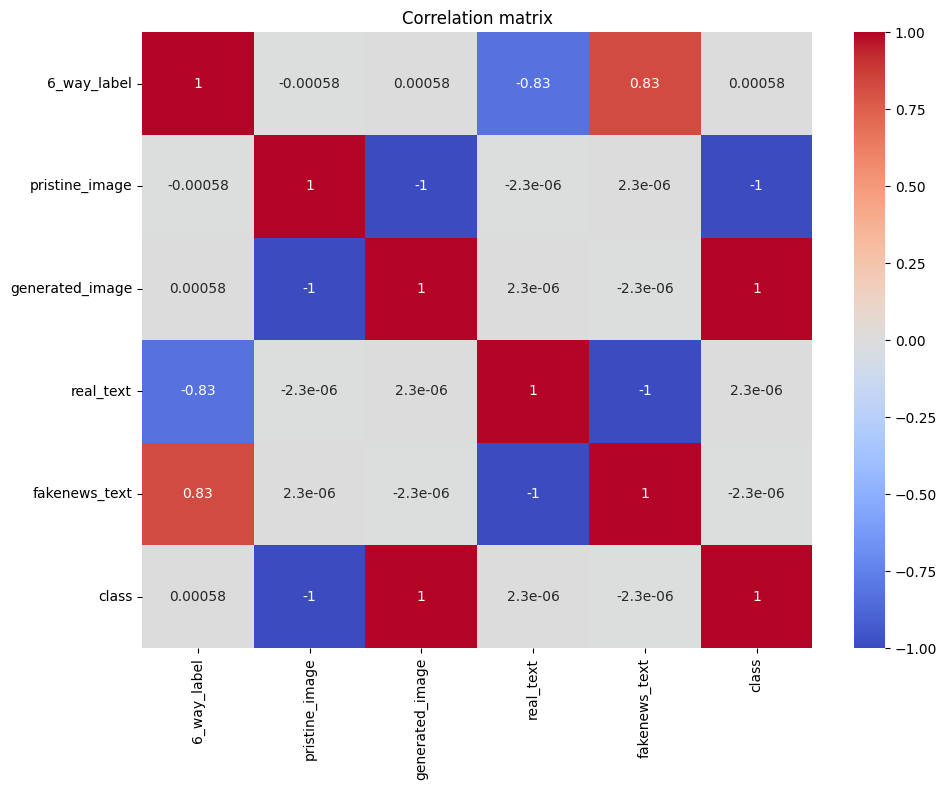

In [29]:
if len(numeric_cols) > 1:
    corr_matrix = train_df[numeric_cols].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Correlation matrix')
    plt.tight_layout()
    plt.show()

**VALIDATION DATA**

In [4]:
val_df = pd.read_csv("/content/validation.csv")
val_df.head(5)

,id,fake_id,author,original_caption,generated_caption,num_comments,6_way_label,pristine_image,generated_image,real_text,fakenews_text,class
0,8bqbfs,DL_fake_8bqbfs,rmw156,hi pup,there is a television sitting on a table in a ...,1.0,2,0,1,0,1,1
1,46euo5,NaN,CalumSyers,this cat with its tongue out,NaN,6.0,0,1,0,1,0,0
2,7n7rum,NaN,all-top-today_SS,til that billion light years away there is a m...,NaN,20.0,3,1,0,0,1,0
3,5t6ht9,NaN,YtseThunder,mark zuckerberg testing prototype vr gloves,NaN,4.0,0,1,0,1,0,0
4,bqqrx3,GL_fake_bqqrx3,FloopyDoopy,how the danske bank money laundering scheme in...,a close up of a building with columns and a si...,2.0,0,0,1,1,0,1


In [7]:
val_df.shape

(40909, 12)

In [14]:
for col in val_df.columns:
  print(f"  {col}: {val_df[col].dtype}")

  id: object
  fake_id: object
  author: object
  original_caption: object
  generated_caption: object
  num_comments: float64
  6_way_label: int64
  pristine_image: int64
  generated_image: int64
  real_text: int64
  fakenews_text: int64
  class: int64


In [19]:
missing = val_df.isnull().sum()
missing

,0
id,0
fake_id,20455
author,1981
original_caption,0
generated_caption,20455
num_comments,0
6_way_label,0
pristine_image,0
generated_image,0
real_text,0


In [27]:
numeric_cols = val_df.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 0:
  print('Numeric columns:\n')
  print(val_df[numeric_cols].describe().round(2))

print('='*50)

categorical_cols = val_df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
  print('Categorical columns:\n')
  for col in categorical_cols:
      print(f"Column '{col}':")
      print(f"Unique values: {val_df[col].nunique()}")
      print(val_df[col].value_counts().head())
      print('\n')

Numeric columns:

       num_comments  6_way_label  pristine_image  generated_image  real_text  \
count      40909.00     40909.00         40909.0          40909.0   40909.00   
mean          20.80         0.98             0.5              0.5       0.56   
std          143.65         1.34             0.5              0.5       0.50   
min            0.00         0.00             0.0              0.0       0.00   
25%            1.00         0.00             0.0              0.0       0.00   
50%            2.00         0.00             1.0              0.0       1.00   
75%            7.00         2.00             1.0              1.0       1.00   
max         7042.00         5.00             1.0              1.0       1.00   

       fakenews_text    class  
count       40909.00  40909.0  
mean            0.44      0.5  
std             0.50      0.5  
min             0.00      0.0  
25%             0.00      0.0  
50%             0.00      0.0  
75%             1.00      1.0  
max  

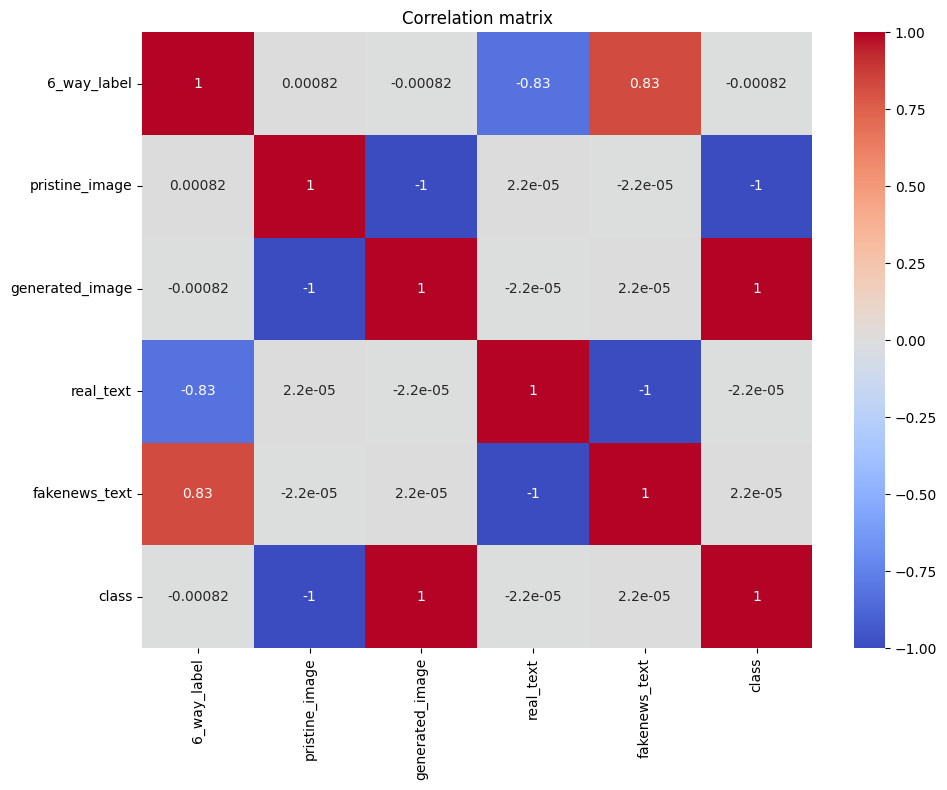

In [30]:
if len(numeric_cols) > 1:
    corr_matrix = val_df[numeric_cols].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Correlation matrix')
    plt.tight_layout()
    plt.show()

**TEST DATA**

In [5]:
test_df = pd.read_csv("/content/test.csv")
test_df.head(5)

,id,original_caption,generated_caption,6_way_label,pristine_image,generated_image,real_text,fakenews_text,class
0,2kkorv,this rock formation i found in a cave looks li...,NaN,2,1,0,0,1,0
1,DL_fake_b5o9ed,this curled up cucumber,there is a cucumber that is sitting on a glass...,0,0,1,1,0,1
2,DL_fake_4oagql,boy trying to catch frisbee,there is a man in an orange shirt playing fris...,0,0,1,1,0,1
3,SD_fake_399kkl,christian minister plans to mark muslim festiv...,man in a suit and tie smiling for a picture,0,0,1,1,0,1
4,3h845h,ninja kid,NaN,0,1,0,1,0,0


In [8]:
test_df.shape

(83134, 9)

In [15]:
for col in test_df.columns:
  print(f"  {col}: {test_df[col].dtype}")

  id: object
  original_caption: object
  generated_caption: object
  6_way_label: int64
  pristine_image: int64
  generated_image: int64
  real_text: int64
  fakenews_text: int64
  class: int64


In [20]:
missing = test_df.isnull().sum()
missing

,0
id,0
original_caption,0
generated_caption,41567
6_way_label,0
pristine_image,0
generated_image,0
real_text,0
fakenews_text,0
class,0


In [28]:
numeric_cols = test_df.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 0:
  print('Numeric columns:\n')
  print(test_df[numeric_cols].describe().round(2))

print('='*50)

categorical_cols = test_df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
  print('Categorical columns:\n')
  for col in categorical_cols:
      print(f"Column '{col}':")
      print(f"Unique values: {test_df[col].nunique()}")
      print(test_df[col].value_counts().head())
      print('\n')

Numeric columns:

       6_way_label  pristine_image  generated_image  real_text  fakenews_text  \
count     83134.00         83134.0          83134.0   83134.00       83134.00   
mean          0.99             0.5              0.5       0.56           0.44   
std           1.35             0.5              0.5       0.50           0.50   
min           0.00             0.0              0.0       0.00           0.00   
25%           0.00             0.0              0.0       0.00           0.00   
50%           0.00             0.5              0.5       1.00           0.00   
75%           2.00             1.0              1.0       1.00           1.00   
max           5.00             1.0              1.0       1.00           1.00   

         class  
count  83134.0  
mean       0.5  
std        0.5  
min        0.0  
25%        0.0  
50%        0.5  
75%        1.0  
max        1.0  
Categorical columns:

Column 'id':
Unique values: 83134
id
dheure            1
2kkorv            1


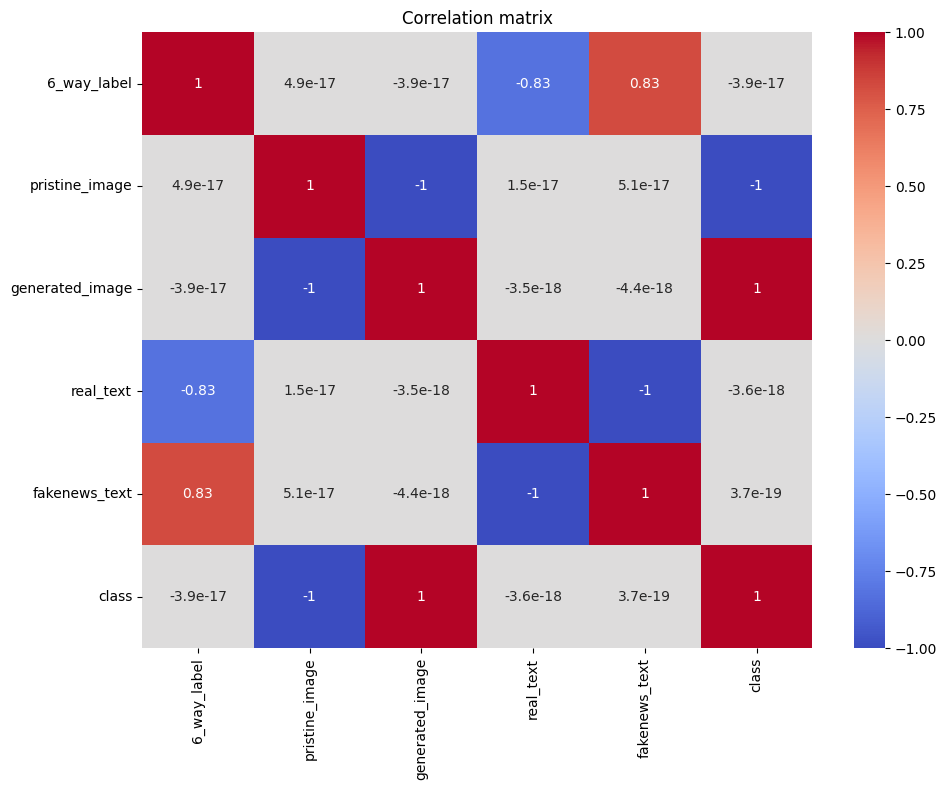

In [31]:
if len(numeric_cols) > 1:
    corr_matrix = test_df[numeric_cols].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Correlation matrix')
    plt.tight_layout()
    plt.show()